In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
data = pd.read_csv('Mall_Customers.csv')
data = data.sample(frac=1)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
179,180,Male,35,93,90
155,156,Female,27,78,89
67,68,Female,68,48,48
68,69,Male,19,48,59
46,47,Female,50,40,55


In [13]:
data.drop(['Genre'], axis=1, inplace=True)
data.drop(['Age'], axis=1, inplace=True)

data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
179,180,93,90
155,156,78,89
67,68,48,48
68,69,48,59
46,47,40,55


/Users/gregormcwilliam/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Customers')

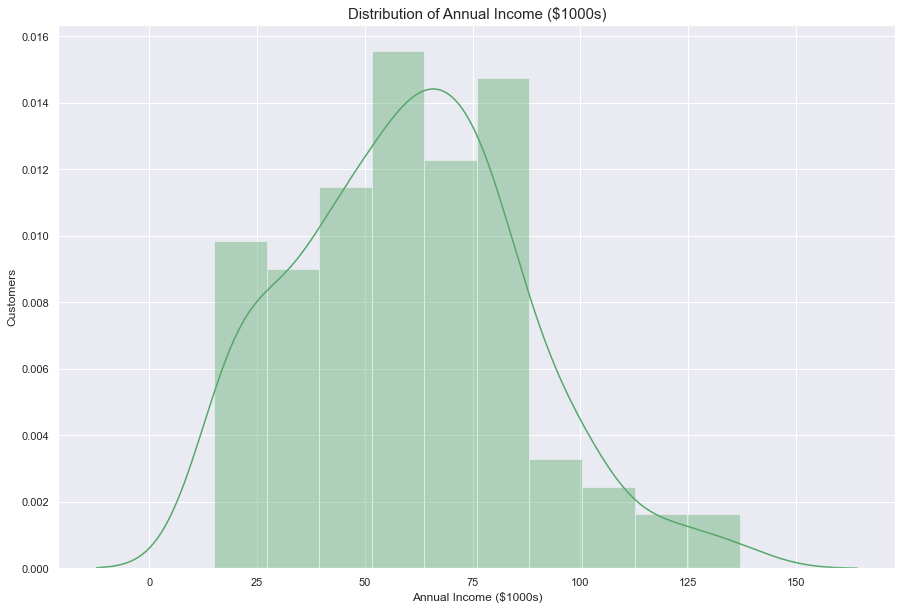

In [50]:
plt.figure(figsize=(15,10))
sns.set(style = 'darkgrid')
sns.distplot(data['Annual Income (k$)'],color='g')
plt.title('Distribution of Annual Income ($1000s)', fontsize = 15)
plt.xlabel('Annual Income ($1000s)')
plt.ylabel('Customers')

/Users/gregormcwilliam/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


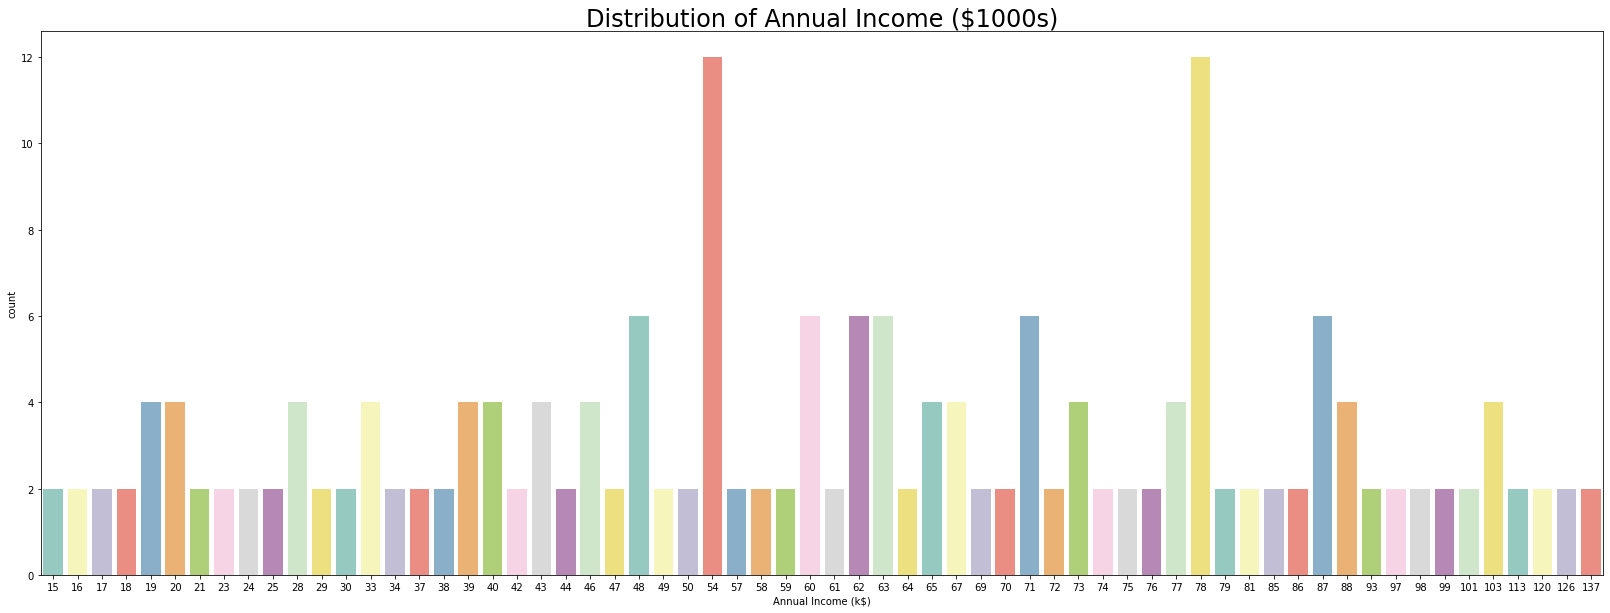

In [19]:
plt.figure(figsize=(28,10))
sns.countplot(data['Annual Income (k$)'], palette = 'Set3')
plt.title('Distribution of Annual Income ($1000s)', fontsize = 24)
plt.show()

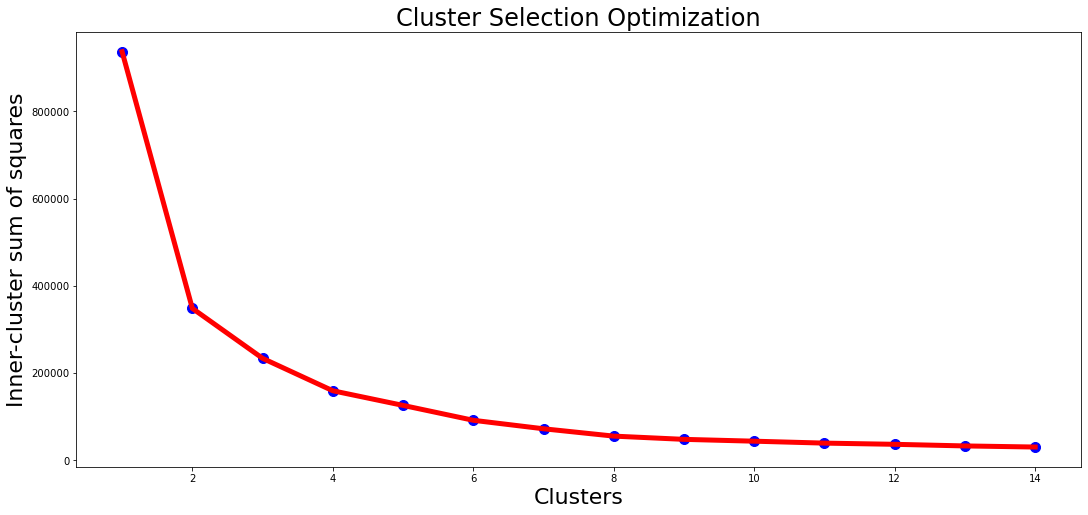

In [37]:
# Determine optimal number of clusters

max_cl = 15
wcss = []

for i in range(1, max_cl):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(18, 8))
plt.scatter(range(1, max_cl), wcss, c='b', s=100)
plt.plot(range(1, max_cl), wcss, c='r', linewidth=5)
plt.title('Cluster Selection Optimization',fontsize=24)
plt.xlabel('Clusters', fontsize=22)
plt.ylabel('Inner-cluster sum of squares', fontsize=22)
plt.show()

In [40]:
# Determined above
k = 4
vals = data.values

k_means = KMeans(n_clusters = k, init = "k-means++").fit(vals)
k_means.fit(data)

KMeans(n_clusters=4)

In [41]:
k_means.labels_

array([3, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2, 3, 0, 1, 0, 2, 2, 2, 0, 2,
       3, 0, 2, 2, 2, 3, 1, 0, 1, 2, 3, 3, 3, 2, 1, 3, 1, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 2, 3, 3, 1, 1, 3, 3, 2, 2, 0, 0, 2, 1, 0, 3, 2, 1,
       1, 0, 2, 0, 2, 3, 1, 0, 3, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 3, 1, 1,
       1, 2, 0, 2, 1, 3, 0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1,
       0, 1, 2, 2, 0, 2, 3, 3, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 3, 3, 2, 3,
       2, 2, 2, 0, 0, 3, 0, 3, 0, 2, 2, 3, 0, 2, 1, 2, 2, 1, 2, 0, 0, 3,
       2, 2, 3, 2, 2, 0, 1, 3, 2, 0, 3, 2, 2, 2, 1, 3, 0, 1, 0, 0, 3, 1,
       1, 2, 3, 3, 0, 3, 3, 3, 0, 2, 1, 0, 0, 2, 2, 1, 3, 2, 0, 2, 0, 1,
       0, 2], dtype=int32)

In [42]:
centers = k_means.cluster_centers_

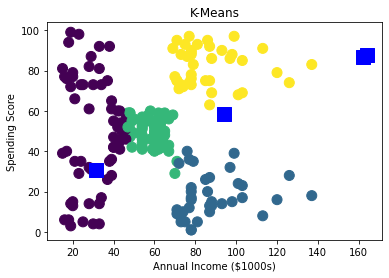

In [44]:
plt.figure()

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=k_means.labels_, s=100)
plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income ($1000s)')
plt.ylabel('Spending Score')
plt.title('K-Means')

plt.show()

/Users/gregormcwilliam/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


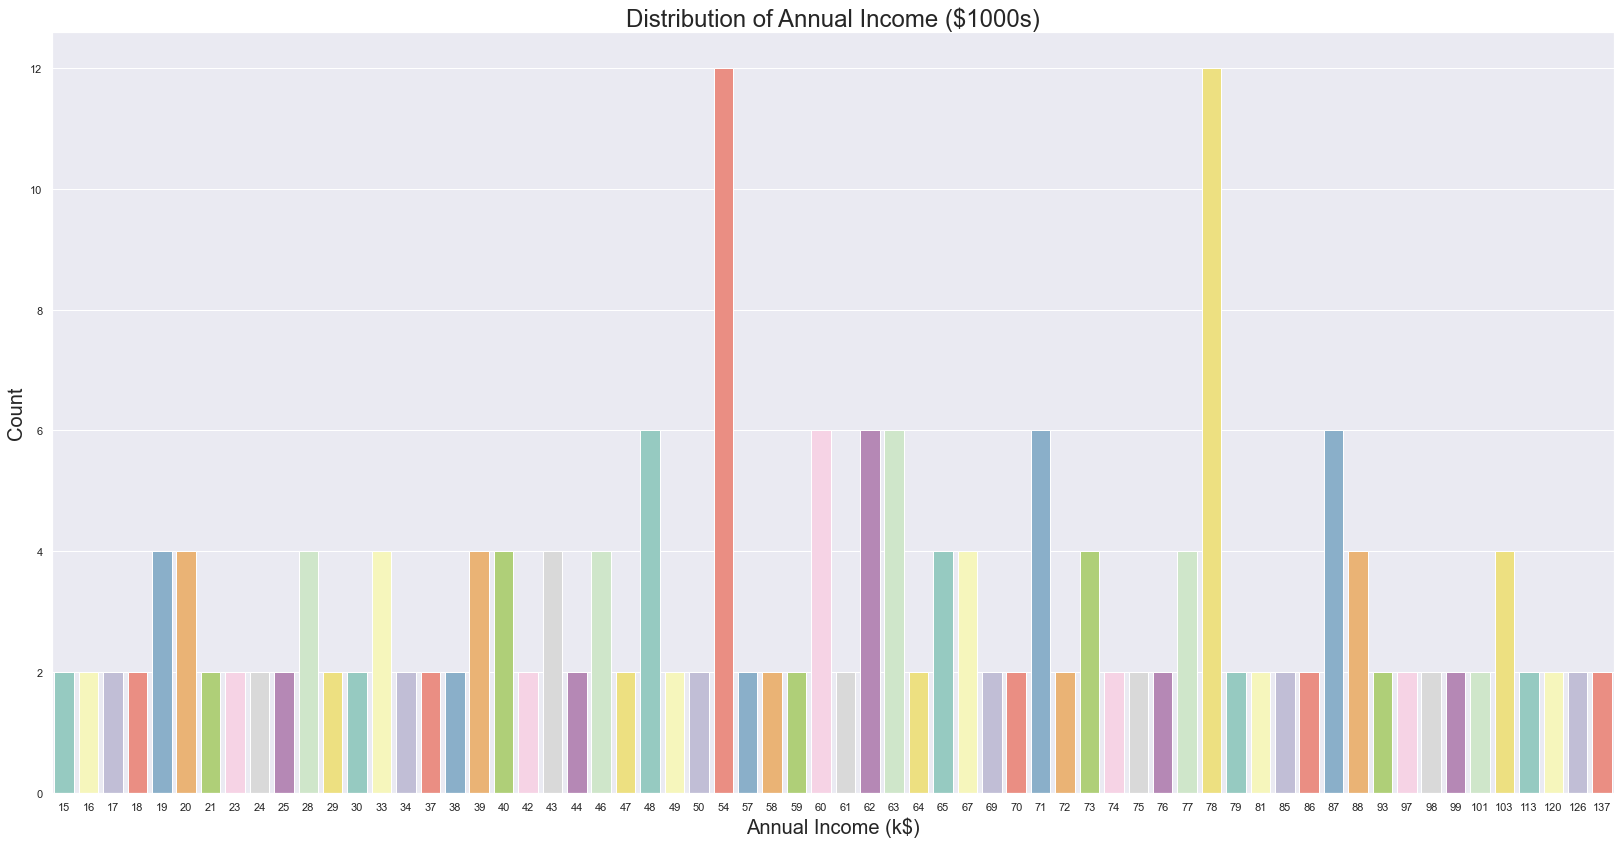

In [62]:
plt.figure(figsize=(28,14))
sns.countplot(data['Annual Income (k$)'], palette = 'Set3')
plt.title('Distribution of Annual Income ($1000s)', fontsize = 24)
plt.xlabel('Annual Income (k$)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

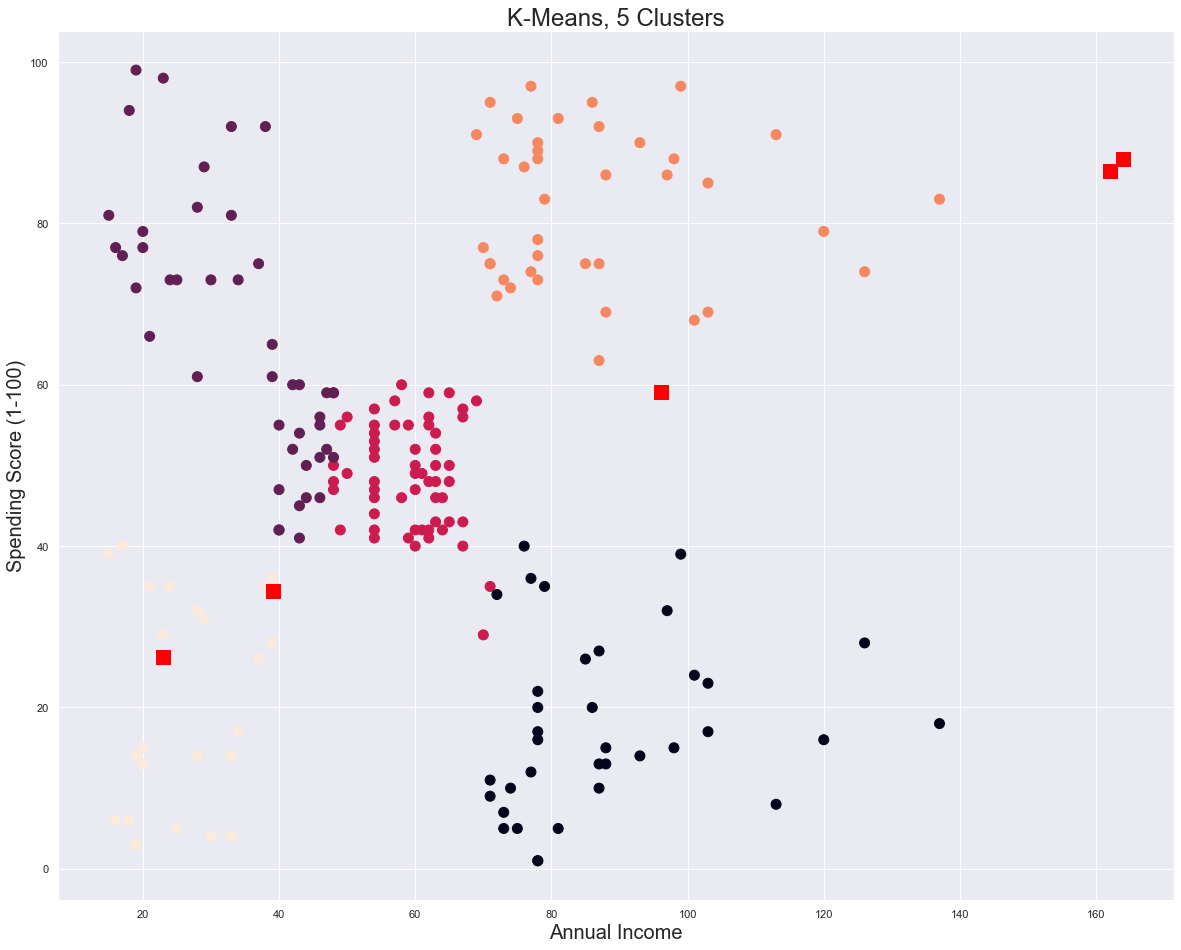

In [63]:
plt.figure(figsize=(20, 16))

plt.scatter(data["Annual Income (k$)"], 
            data["Spending Score (1-100)"], 
            c = k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color="red", marker = 's', s = 200) 

plt.xlabel("Annual Income", fontsize=20)
plt.ylabel("Spending Score (1-100)", fontsize=20)
plt.title("K-Means, 5 Clusters", fontsize=24)

plt.show()